<a href="https://colab.research.google.com/github/AsifKarimShaik/AsifKarimShaik/blob/main/Moving_Averages_and_Evaluating_a_Model_CC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this notebook is to get comfortable with basic data analysis for supply chain and finance problems.

By the end of this lesson, will be able to:
* Create and slice Python data structures (lists vs. dictionaries, numpy arrays vs. pandas dataframes)
* Import common Python libraries for data wrangling and plotting
* Describe, fit and evalaute a the moving average model model (by defining your own function vs. using built-in functions from numpy and pandas)
* Write math formulas in $\LaTeX$

This content comes from the first two chapters of this book:
* "Data Science for Supply Chain Forecasting" 2nd Edition, by Nicolas Vandeput

**Key Python skills:**
Students should be able to fill in the notebook in key areas (from memory!) related to:
* Slicing lists, dictionaries and dataframes
* Adding a new column to a dataframe
* Renaming the columns in a dataframe


# Quick Python Recap

You know this content already, this should be boring!

## List

In [ ]:
ts = [1,2,3,4,5,6]

In [ ]:
ts2 = [10,20,30,40,50,60]

In [ ]:
# just returns a longer list...
# it appended one list to another
# useful, but this is not what we wanted!
ts+ts2

[1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60]

## `numpy` array

In [ ]:
import numpy as np
ts = np.array([1,2,3,4,5,6])
ts

array([1, 2, 3, 4, 5, 6])

In [ ]:
ts2 = np.array([10,20,30,40,50,60])
ts2

array([10, 20, 30, 40, 50, 60])

In [ ]:
# this is what we wanted!
ts+ts2

array([11, 22, 33, 44, 55, 66])

Note that the output of `ts`, `ts2` and `ts+ts2` are all numpy arrays - not lists!

However, numpy works well with lists - for example...

In [ ]:
myList = [1,2,3]
np.mean(myList)

2.0

## List slicing
To select a particular value in a list (or a numpy array), you simply have to indicate the location (known as the 'index') between the `[ ]` square brackets. **Remember that Python numbers the items starting from 0, and not from 1!**

In [ ]:
# slicing a list of string data
myList = ['cat', 'dog', 'mouse']
myList[1]

'dog'

In [ ]:
# slicing a list of numeric data
myList = [1,2,3]
myList[0] # remember - Python counts from zero!

1

If you want to select multiple elements from a list, you can use a range with the format `start:end`.

Pay attention that the end result will include the `start` element but exclude the `end` element.

In [ ]:
myList = ['cat', 'dog', 'mouse', 'elephant']
myList[1:]

['dog', 'mouse', 'elephant']

In [ ]:
myList = ['cat', 'dog', 'mouse', 'elephant']
myList[1:3]

['dog', 'mouse']

If you give a negative value at the end, it will start counting backward from the last element of your list.

In [ ]:
myList = ['cat', 'dog', 'mouse', 'elephant']
myList[:-1]

['cat', 'dog', 'mouse']

In [ ]:
myList = ['cat', 'dog', 'mouse', 'elephant',]

['cat', 'dog']

## `pandas`

We will use Pandas to manipulate tables in Python.

In [ ]:
[ts,ts2]

[array([1, 2, 3, 4, 5, 6]), array([10, 20, 30, 40, 50, 60])]

In [ ]:
import pandas as pd
pd.DataFrame([ts,ts2])

,0,1,2,3,4,5
0,1,2,3,4,5,6
1,10,20,30,40,50,60


### Working with Dataframes

In [ ]:
df = pd.DataFrame([ts,ts2])
# look at first few rows
df.head(n=5)

,0,1,2,3,4,5
0,1,2,3,4,5,6
1,10,20,30,40,50,60


To change the column names, we make a list then specify this as an attribute of the pandas dataframe.

In [ ]:
# print out the columns
df.columns

RangeIndex(start=0, stop=6, step=1)

In [ ]:
# change column names
df.columns = ['Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6']
df # check your work!

,Day1,Day2,Day3,Day4,Day5,Day6
0,1,2,3,4,5,6
1,10,20,30,40,50,60


### Selecting a single column and all rows

Now let's try a few ways of selecting the first column, `Day1`.

In [ ]:
# single quotes
df['Day1']

0     1
1    10
Name: Day1, dtype: int64

In [ ]:
# double quotes (don't mix and match single and double quotes! pick one and use it for life)
df["Day1"]

0     1
1    10
Name: Day1, dtype: int64

In [ ]:
# you can use a period instead of square brackets
# but I personally don't like that column names don't light-up red!
df.Day1

0     1
1    10
Name: Day1, dtype: int64

In [ ]:
myIndexValue = 0
# this locator (loc) selects the first row and a specific column by name
df.loc[myIndexValue,'Day1']

1

In [ ]:
# iloc stands for 'integer locator' - specify the rows/columns you want
# by integer location!
df.iloc[0,0] # same as previous example!

1

### Selecting more than one column and all rows

Let's try to select the first and third column.

Remember - Python counts from zero!

In [ ]:
# single quotes
df[['Day1','Day3']]

,Day1,Day3
0,1,3
1,10,30


In [ ]:
myIndexValue = 0
# this locator (loc) selects the first row and a specific column by name
x = df.loc[myIndexValue,['Day1', 'Day3']]
x

Day1    1
Day3    3
Name: 0, dtype: int64

In [ ]:
# but be careful... you went from a dataframe to a series!
type(x)

pandas.core.series.Series

## Dictionaries


In [ ]:
d = {'Small product':ts, 'Big product':ts2, 0:ts, 1:ts2}
d[0]
d['Small product']

{'Small product': array([1, 2, 3, 4, 5, 6]),
 'Big product': array([10, 20, 30, 40, 50, 60])}

Here the `key` value `'Small product'` and will give you the value `ts`. The `key` value `'Big product'` will give you `ts2`.

In [ ]:
# selecting the value from a dictionary based on a key
d['Small product']

array([1, 2, 3, 4, 5, 6])

In [ ]:
# we can perform mathematical operations on the values!
d['Small product'] + d['Big product']

array([11, 22, 33, 44, 55, 66])

What's a nice perk about the dictionary? You don't have to worry about manipulating data as a function of position - you can query it directly based on a key.

Of course, we can also create a `pandas Dataframe` from this dictionary.

In [ ]:
df = pd.DataFrame.from_dict(d)
df

,Small product,Big product
0,1,10
1,2,20
2,3,30
3,4,40
4,5,50
5,6,60


Now **THIS** is really starting to look like an Excel spreadsheet which can be easily manipulated.

Each column has its own column and each row is another period.

# Moving Average Function


## Exercise: Let's compute the moving average using only lists and for **loops**

- Let's return the forecast vector and the error vector

In [ ]:
d = [28,19,18,13,19,16,19,18,17,13,16,16,11,18,15,13,15,13,11,13,10,12]

* Compute the regular average

In [ ]:
n = len(d)
# print(n)
sum = 0
count = 0
for i in d:
  count += 1
  sum = sum + i
  # sum += i
  print(i,sum,sum/count)
print(sum/n)

* Moving average of size 3

In [ ]:
l = list()
k = 5
for i in range(len(d)-(k-1)):
  sum = 0
  for j in range(i,i+k):
    sum += d[j]
  # sum = (d[i] + d[i+1] + d[i+2])/3
  l.append(sum/k)

print(l)

[19.4, 17.0, 17.0, 17.0, 17.8, 16.6, 16.6, 16.0, 14.6, 14.8, 15.2, 14.6, 14.4, 14.8, 13.4, 13.0, 12.4, 11.8]


* Moving average with size $k$ (where $k$ is a parameter)

## Writing your own function

In [ ]:
def moving_average(d, n=3):
  # transform the input into a numpy array
  d = np.array(d)
  # historical period length
  cols = len(d)
  # define the forecast array
  f = np.full(cols, np.nan)

  # create the t+1 forecasts until end of the historical period for window of size n
  for t in range(n, cols):
    # print(t,d[t-n:t]) # Don't understand the code? Print the variables!
    f[t] = np.mean(d[t-n:t])

  # return a dataframe with the demand, forecast and error
  df = pd.DataFrame.from_dict({'Demand':   d,
                               'Forecast': f,
                               "Error":    d-f})
  return df

Can you say what each part of the code does? If not, break it out line by line and examine it!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = [28,19,18,13,19,16,19,18,17,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = moving_average(d)
df

3 [28 19 18]
4 [19 18 13]
5 [18 13 19]
6 [13 19 16]
7 [19 16 19]
8 [16 19 18]
9 [19 18 17]
10 [18 17 13]
11 [17 13 16]
12 [13 16 16]
13 [16 16 11]
14 [16 11 18]
15 [11 18 15]
16 [18 15 13]
17 [15 13 15]
18 [13 15 13]
19 [15 13 11]
20 [13 11 13]
21 [11 13 10]


,Demand,Forecast,Error
0,28,NaN,NaN
1,19,NaN,NaN
2,18,NaN,NaN
3,13,21.666667,-8.666667
4,19,16.666667,2.333333
5,16,16.666667,-0.666667
6,19,16.000000,3.000000
7,18,18.000000,0.000000
8,17,17.666667,-0.666667
9,13,18.000000,-5.000000


## Visualizing the results with pandas

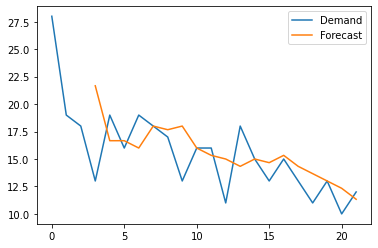

In [ ]:
df[['Demand','Forecast']].plot()
plt.show()

## Customizing the plot
Let's add some parameters to make a nicer plot.

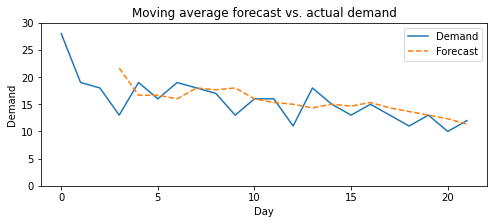

In [ ]:
df[['Demand','Forecast']].plot(
    figsize=(8,3),
    title='Moving average forecast vs. actual demand',
    xlabel="Day",
    ylabel="Demand",
    ylim=(0,30),
    style=['-','--']
)
plt.show()

##### **On your own:** use the moving average function from pandas!
Google 'moving average pandas' and see if you can recreate the results using a built-in function. See how easy it is?!

In [ ]:
tmp = d
tmp = pd.DataFrame(d)
tmp.columns = ['Demand']
tmp['MovingAverageModel'] = tmp['Demand'].rolling(3).mean()
tmp

,Demand,MovingAverageModel
0,28,NaN
1,19,NaN
2,18,21.666667
3,13,16.666667
4,19,16.666667
5,16,16.000000
6,19,18.000000
7,18,17.666667
8,17,18.000000
9,13,16.000000


Not the same table, right? We actually need to shift the rows

In [ ]:
tmp = d
tmp = pd.DataFrame(d)
tmp.columns = ['Demand']
tmp['MovingAverageModel'] = tmp['Demand'].rolling(3).mean().shift(1)
tmp

,Demand,MovingAverageModel
0,28,NaN
1,19,NaN
2,18,NaN
3,13,21.666667
4,19,16.666667
5,16,16.666667
6,19,16.000000
7,18,18.000000
8,17,17.666667
9,13,18.000000


# Evaluate the model
Now that you have fit a model, it's time to evaluate the accuracy. There is no 'one size fits all' indicator or error metric that is appropriate for every model, the correct choice of metric(s) can vary based on the use case.

For example, sometimes we want to emphasize how the model does with outliers vs. more common observations. Which metric would you use in this case?

When you are in a meeting, you should ALWAYS have the formula presented in your slides/documentation so that everyone understands how you evaluated your model.

Note that these error metrics are to be used for numeric target variables (regression problems).

## Error
$e_t = f_t - d_t$

where:
* $e_t$ is the error for time step $t$
* $f_t$ is the forecast for time step $t$
* $d_t$ is the actual demand for time step $t$

## Mean Absolute Error
The absolute error is simply the absolute value of the error term. We can calculate the average absolute error per observation to say 'regardless of the sign, how far off was the model?'

$\text{MAE} = \frac{1}{n} \sum |e_t|$

The units of MAE are on the same scale as the demand (actual).

## Mean Absolute Percentage Error
For each observation, how off were you from the actual value (in terms of percentage)?

$\text{MAPE} = \frac{1}{n} \sum \frac{|e_t|}{d_t}$

The units of MAPE are a percentage.

The downside of MAPE is that MAPE divides each error per observation by the demand per observation. And so high errors during low demand periods will really skew the MAPE. As a result, in practice, optimizing a model to 'MAPE' may result in a model that underestimates.

## Root Mean Square Error (RMSE)
It is defined as the square root of the average squared error.

$\text{RMSE} = \sqrt{ \frac{1}{n} \sum e_t^2}$

Many supply chain and data science models are optimized based on minimizing the Mean Square Error (MSE) which is directly related to RMSE.

$\text{MSE} = \frac{1}{n} \sum{e_t^2}$

The units of RMSE are the same as the demand (actual) variable. The units of MSE are units SQUARED.

# Evaluating the moving average model
Using the model evaluation metrics from the `sklearn` model makes it easy to evaluate the errors!

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = [28,19,18,13,19,16,19,18,17,13,16,16,11,18,15,13,15,13,11,13,10,12]
df = moving_average(d)
df

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Demand,Forecast,Error
0,28,NaN,NaN
1,19,NaN,NaN
2,18,NaN,NaN
3,13,21.666667,-8.666667
4,19,16.666667,2.333333
5,16,16.666667,-0.666667
6,19,16.000000,3.000000
7,18,18.000000,0.000000
8,17,17.666667,-0.666667
9,13,18.000000,-5.000000


Check the documentation to review the arguments to the functions:
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html\

To get RMSE, you need to add a keyword argument

```
squaredbool, default=True
If True returns MSE value, if False returns RMSE value.
```

In [ ]:
# import useful functions to help us evaluate the model
# every sklearn library uses the convention `metric(actual, predicted)`
# you should use this convention, too!
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# uncomment this to get the error
print('MAE:', mean_absolute_error(y_true=df['Demand'], y_pred=df['Forecast']))

ValueError: ignored

**Oops!** You have some NaN values in your forecast. You can drop rows and re-run.

In [ ]:
df.dropna(inplace=True)
print('MAE:', mean_absolute_error(y_true=df['Demand'], y_pred=df['Forecast']))
print('MSE:', mean_squared_error(y_true=df['Demand'], y_pred=df['Forecast'], squared=True))
print('RMSE:', mean_squared_error(y_true=df['Demand'], y_pred=df['Forecast'], squared=False))

MAE: 1.9824561403508774
MSE: 8.578947368421055
RMSE: 2.9289840164161114


Of course MSE will always be bigger than RMSE!

##  Exercise: Let's write functions to compute these metrics

You can write it like an Excel function and keep track of mathematical order of operations, or you can be more advanced! I recommend starting small first and using the beginner version of the code.

$\text{MAE} = \frac{1}{n} \sum |e_t|$


In [ ]:
# beginner version
def mae(error_list):
  return

$\text{MSE} = \frac{1}{n} \sum{e_t^2}$

In [ ]:
# beginner version
def mse(error_list):
  return


$\text{RMSE} = \sqrt{ \frac{1}{n} \sum e_t^2}$

In [ ]:
# beginner version
def rmse(error_list):
  return

# A Concrete Example
Here's a supply chain example. Imagine a product with a low and rather flat weekly demand that has from time to time a big order (maybe due to promotions or clients ordering in batches). Here is the demand per week that we have observed so far.

|Day|W1|W2|W3|W4|W5|
|---|---|---|---|---|---|
|Mon|3|3|4|1|5|
|Tue|1|4|1|2|2|
|Wed|5|5|1|1|12|
|Thu|20|4|3|2|1|
|Fri|13|16|14|5|20|

In [ ]:
# let's translate this into a list of values
# one list for each week seems like a good idea
w1 = [3,1,5,20,13]
w2 = [3,4,5,4,16]
w3 = [4,1,1,3,14]
w4 = [1,2,1,2,5]
w5 = [5,2,12,1,20]

In [ ]:
d = [w1, w2, w3, w4, w5]
d

[[3, 1, 5, 20, 13],
 [3, 4, 5, 4, 16],
 [4, 1, 1, 3, 14],
 [1, 2, 1, 2, 5],
 [5, 2, 12, 1, 20]]

This almost looks good, but it's a list of lists. We can flatten it into a single list.

Found using the Google search 'nested list to flat list python'. You need to be able to articulate the problem you are trying to solve (which can be difficult to do at first!)

* https://stackoverflow.com/questions/952914/how-do-i-make-a-flat-list-out-of-a-list-of-lists

In [ ]:
flat_list = [item for sublist in d for item in sublist]
flat_list

[3,
 1,
 5,
 20,
 13,
 3,
 4,
 5,
 4,
 16,
 4,
 1,
 1,
 3,
 14,
 1,
 2,
 1,
 2,
 5,
 5,
 2,
 12,
 1,
 20]

Equivalent way of obtaining the same list

In [ ]:
flat_list = []
for sublist in d:
    for item in sublist:
        flat_list.append(item)
flat_list

[3,
 1,
 5,
 20,
 13,
 3,
 4,
 5,
 4,
 16,
 4,
 1,
 1,
 3,
 14,
 1,
 2,
 1,
 2,
 5,
 5,
 2,
 12,
 1,
 20]

## Using describe() to get a lot of information

Let's do some light formatting and make it look really clean for analysis. We will rename columns and use a dataframe (this will make it easier to plot our work, too!) Like an Excel spreadsheet on steroids.

In [ ]:
# note that I am overwriting df quite a bit in this notebook
# you need to keep track of all of the data you are creating
# is something acting funky? restart and run all and see if that helps!
df = pd.DataFrame(flat_list)
df.columns = ['demand']
df

,demand
0,3
1,1
2,5
3,20
4,13
5,3
6,4
7,5
8,4
9,16


In [ ]:
# let's calculate some summary statistics on the historic demand
df.describe()

,demand
count,25.000000
mean,5.920000
std,6.061628
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,20.000000


We see the mean is 5.9 (~6), the 25th percentile is 2, and the 50th percentile is 4.

## Final exercise: Compute all the parameters of describe() without pandas or numpy!